<a href="https://colab.research.google.com/github/nehacodes00/Exploratory-Data-Analysis-of-Car-Features/blob/master/EDA_OF_CAR_FEATURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EXPLORATORY DATA ANALYSIS OF CAR FEATURES***

The objective of the project is to do data pre-processing and exploratory data analysis of the dataset.

**1.1** ***Importing the python libraries***

In [1]:
#Importing required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
#for visualisation
import matplotlib.pyplot as mpt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.impute import SimpleImputer #for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #for categorical 
from sklearn.model_selection import train_test_split #for splitting training & testing the data
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.linear_model import LinearRegression #to fit linear regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures #To fit polynomial regression
from sklearn.ensemble import RandomForestRegressor #to fit RFR
from sklearn.tree import tree #to fit decision tree



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


***1.2 Importing the dataset***

In [2]:
df=pd.read_csv('data.csv')

***1.3 Check data type***

In [3]:
#Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

***1.4 Statistical summary***

In [4]:
#statistical summary of the data
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


*1.4 To display the top 5*

In [5]:
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


***1.5 Number of rows and columns***

In [6]:
#Shape of the data in tuple format
df.shape

(11914, 16)

***1.6 Check for the number of null values***

In [7]:
#Number of null values in each columns
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

1.7 Names of all the columns


In [8]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

***2. Dropping less relevant columns***

In [9]:
#Since Market Category, Engine Fuel Type and Number of doors has no relevance to price, drop them.
df.drop(['Market Category', 'Engine Fuel Type', 'Number of Doors'], axis=1, inplace=True)


In [10]:
df.shape

(11914, 13)

***3. Renaming the columns as given.***

In [11]:
#Renaming the columns.
df=df.rename(columns={"Engine HP":"HP", "Engine Cylinders":"Cylinders", "Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H", "city mpg":"MPG-C", "MSRP":"Price"})
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


***4. Dropping duplicate values and null values.***

In [12]:
#Total number of rows and columns
df.shape

(11914, 13)

In [13]:
#Rows containing duplicate data
duplicate_df=df[df.duplicated()]
print("NUMBER OF DUPLICATE ROWS=", duplicate_df.shape)

NUMBER OF DUPLICATE ROWS= (792, 13)


In [14]:
#Removing duplicate data
df=df.drop_duplicates()
df.shape

(11122, 13)

In [15]:
#Number of rows after removing duplicate
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

***4. Dropping the null value***

In [16]:
#Finding the number of null values
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

So, there are 99 null values. Dropping 99 values out of approx 10,000 data does not matter since it is a small number and hence negligible.

In [17]:
#Dropping 99 null values
df=df.dropna()
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

In [18]:
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

***5. Detecting outliers using box plot and removing them***

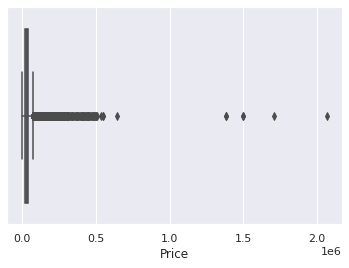

In [19]:
#Detecting the outliers
sns.boxplot(x=df['Price']) #Box plot of Price

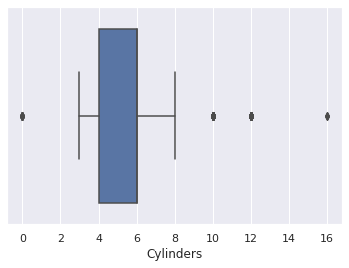

In [20]:
sns.boxplot(x=df['Cylinders']) #Box plot of Cylinder

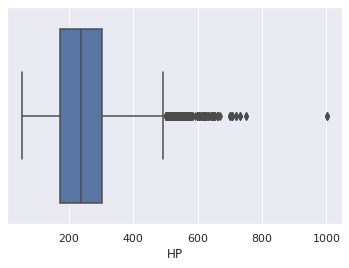

In [21]:
sns.boxplot(x=df['HP']) #Box plot of HP

In [22]:
#Removing outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64

In [23]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(8546, 13)

***6. Most represented car brands***

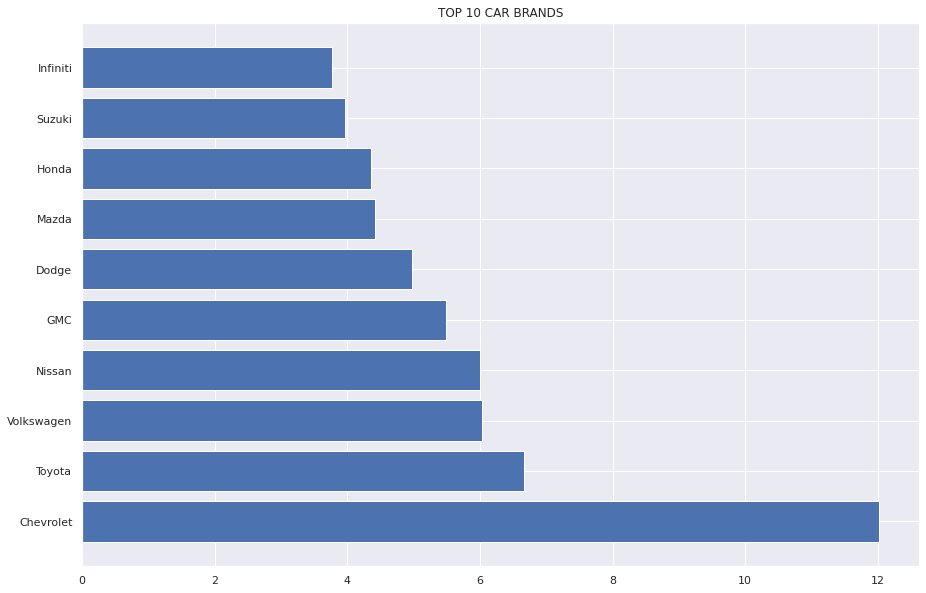

In [24]:
#percentage of car per brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 10 car brands
popular_brands=counts.index[:10]

#Plotting the graph
mpt.figure(figsize=(15,10))
mpt.barh(popular_brands, width=counts[:10])
mpt.title('TOP 10 CAR BRANDS')
mpt.show()


***6.1 Average car price among the popular car brands***

In [25]:
prices=df[['Make','Price']].loc[(df['Make']=='Chevrolet')|
                                (df['Make']=='Toyota')|
                                (df['Make']=='Volkswagen')|
                                (df['Make']=='Nissan')|
                                (df['Make']=='GMC')|
                                (df['Make']=='Dodge')|
                                (df['Make']=='Mazda')|
                                (df['Make']=='Honda')|
                                (df['Make']=='Suzuki')|
                                (df['Make']=='Infiniti')].groupby('Make').mean()
print(prices)                 

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


**7. Correlation matrix**

In [26]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


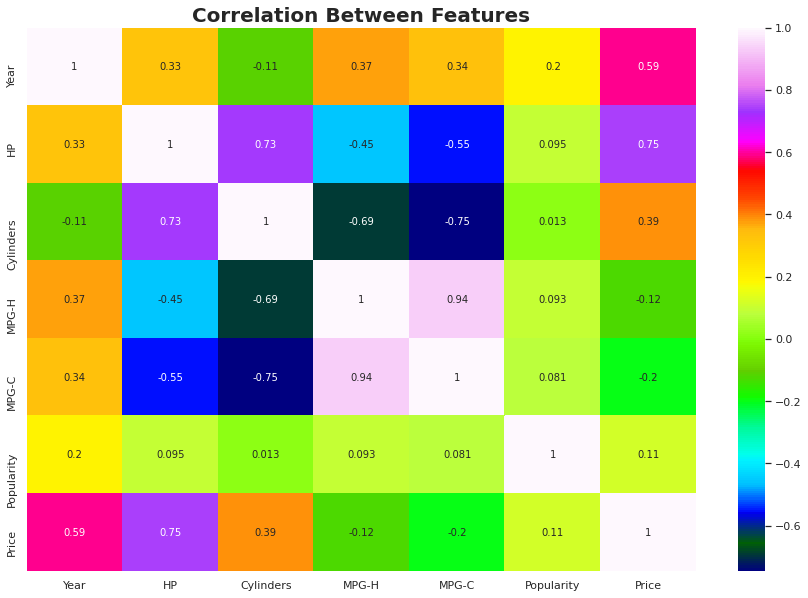

In [27]:
c=df.corr()
f,ax=mpt.subplots(figsize=(15,10))
sns.heatmap(c, cmap='gist_ncar', annot=True)
mpt.title("Correlation Between Features", weight='bold', fontsize=20)
mpt.show()

Accorinding to the above data, there is a "HIGH CORRELATION" between


1.   highway mpg and city mpg
2.   Cylinders and HP (more number of cylinders, more powerful the car is)

The price is highly dependent on HP and Cylinders.

Also there is a "HIGH ANTICORRELATION" between
Cylinders and highway mpg


Highway mpg have a strong negative correlation with highway mpg and city mpg because lower mpg figures means there is higher fuel consumption.



***8. EDA and Plotting different graphs***

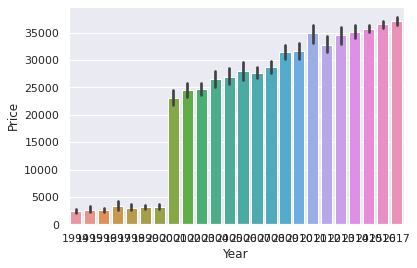

In [28]:
sns.barplot(df['Year'], df['Price']) #to see how price varies with years.

From the above graph, we can clearly see that there was a gradual increase ansd decrease in the initial years. But as the years pass on the Price is also increasing.
The cars price increased after year 2000.

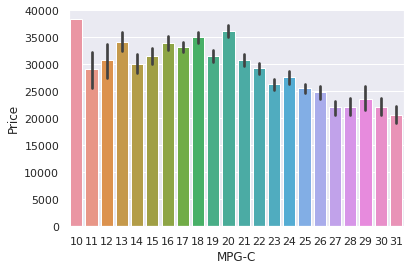

In [29]:
sns.barplot(df['MPG-C'], df['Price'])

There is a fluctuation with price for MPG-C. In general, as MPG-C increases there is gradual decrease in price.
For MPG-C 10 the price is max and for MPG-C 31 price is comparatively less.

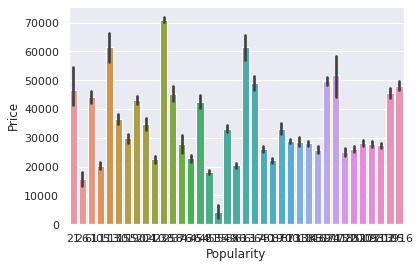

In [30]:
sns.barplot(df['Popularity'], df['Price'])

Popularity does not affect the Price.

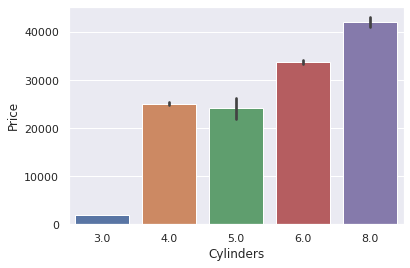

In [31]:
sns.barplot(df['Cylinders'], df['Price'])

Price increases as number of cylinders increase. More the number of cylinders, more is the Price.

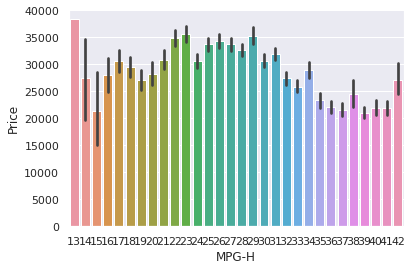

In [32]:
sns.barplot(df['MPG-H'], df['Price'])

Price is highest for MPG-H 13 and lowest for MPG-H 15.

# ***9. Splitting the dataset into 80 and 20 ratio and building a machine learning model.(Price as a target variable)***

In [33]:
#Excluding all non-numeric datatype in the dataset.
exl=df.select_dtypes(exclude=[np.number])
exl

,Make,Model,Transmission,Drive Mode,Vehicle Size,Vehicle Style
0,BMW,1 Series M,MANUAL,rear wheel drive,Compact,Coupe
1,BMW,1 Series,MANUAL,rear wheel drive,Compact,Convertible
2,BMW,1 Series,MANUAL,rear wheel drive,Compact,Coupe
3,BMW,1 Series,MANUAL,rear wheel drive,Compact,Coupe
4,BMW,1 Series,MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...,...
11909,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,Acura,ZDX,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


In [34]:
#Creating object instance
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_enc=LabelEncoder()
for i in exl:
  df[i]=label_enc.fit_transform(df[i])
df[i]
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


In [35]:
#Preprocessing the data befor splitting
x=df[['Year', 'Popularity', 'Cylinders', 'HP', 'MPG-H', 'MPG-C']].values #storing the data
y=df['Price'].values #Setting the Price as a target variable
scx=StandardScaler()
scy=StandardScaler()
x=scx.fit_transform(x)
y=scy.fit_transform(y.reshape(-1,1))


In [36]:
#Splitting the dataset in 80:20 

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0) 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(6836, 6) (6836, 1)
(1710, 6) (1710, 1)


In [37]:
#Fitting linear regression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training accuracy: 0.6983664929728883
Testing accuracy: 0.6800475541161141


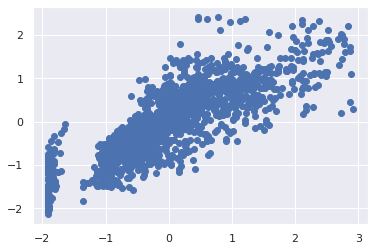

In [38]:
#TEST results
result=model.predict(x_test)
mpt.scatter(y_test, result)
model.score(x_test, result)
print("Training accuracy:", model.score(x_train, y_train))
print("Testing accuracy:", model.score(x_test, y_test))

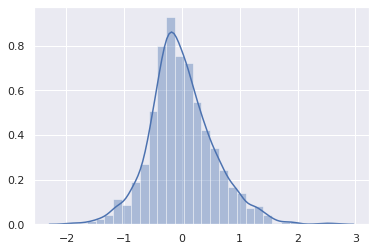

In [39]:
#Visualisation
sns.distplot((y_test-result), bins=30)

We can see that the error is normalised upto 90%.

In [40]:
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, result))
print('R squared: %.2f' %r2_score(y_test, result))
print('Mean absolute Error: %.2f' %mean_absolute_error(y_test, result))
print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, result)))

Mean Squared Error: 0.31
R squared: 0.68
Mean absolute Error: 0.43
RMSE: 0.56


# ***10. Checking different algorithms and checking their performance.***

**1) Using Support Vector Regression**

In [41]:
#Support Vector Regression
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Training accuracy: 0.8266543075371653
Testing accuracy: 0.8140493621762496


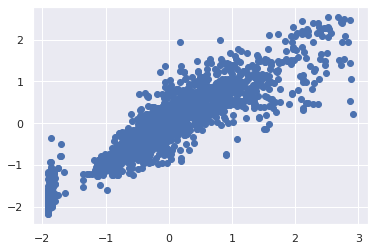

In [42]:
#Predicting new result
result=reg.predict(x_test)
mpt.scatter(y_test, result)
print("Training accuracy:", reg.score(x_train, y_train))
print("Testing accuracy:", reg.score(x_test, y_test))

By using SVR we can see that the testing accuracy has changed from 0.68 to 0.81

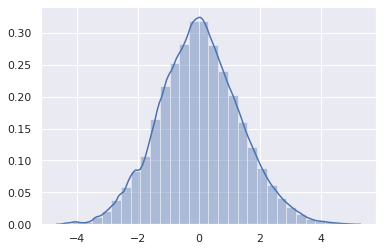

In [43]:
sns.distplot((y_test-result), bins=30)

The error has improved further, that is we have much better normal distribution compared to previous one.

In [44]:
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, result))
print('R squared: %.2f' %r2_score(y_test, result))
print('Mean absolute Error: %.2f' %mean_absolute_error(y_test, result))
print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, result)))

Mean Squared Error: 0.18
R squared: 0.81
Mean absolute Error: 0.30
RMSE: 0.43


**2) Using Polynomial Regression**

In [45]:
poly=PolynomialFeatures(degree=4)
x_pol=poly.fit_transform(x_train)
poly.fit(x_pol, y_train)
lreg=LinearRegression()
lreg.fit(x_pol,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

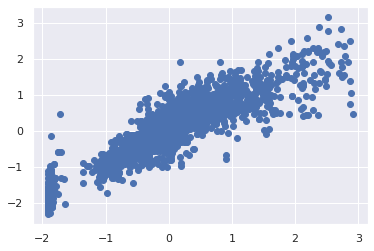

In [46]:
result=lreg.predict(poly.fit_transform(x_test))
mpt.scatter(y_test, result)


In [47]:
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, result))
print('R squared: %.2f' %r2_score(y_test, result))
print('Mean absolute Error: %.2f' %mean_absolute_error(y_test, result))
print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, result)))

Mean Squared Error: 0.19
R squared: 0.81
Mean absolute Error: 0.32
RMSE: 0.44


We can see that RMSE value remains the same as we got for SVR fit.

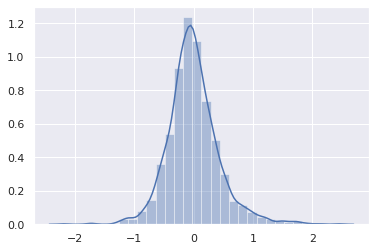

In [48]:
sns.distplot((y_test-result), bins=30)

The normalised error remains the same as it was in SVR fit.

**3)Random Forest Regression**

In [49]:
rfr=RandomForestRegressor(n_estimators=300, random_state=0)
rfr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

training accuracy: 0.9689072260054704
Testing accuracy: 0.937007286185003


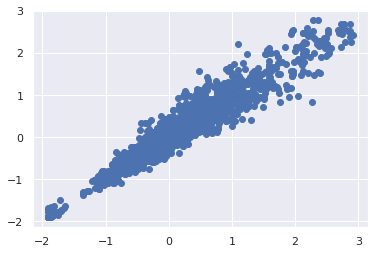

In [50]:
result=rfr.predict(x_test)
mpt.scatter(y_test, result)
print("training accuracy:", rfr.score(x_train, y_train))
print("Testing accuracy:", rfr.score(x_test, y_test))

We are getting testing accuracy as 0.93 which is a huge improvement.

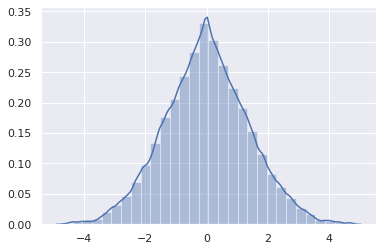

In [51]:
sns.distplot((y_test-result), bins=30)

Woah, the error has a much better normalised distribution now. 

In [52]:
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, result))
print('R squared: %.2f' %r2_score(y_test, result))
print('Mean absolute Error: %.2f' %mean_absolute_error(y_test, result))
print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, result)))

Mean Squared Error: 0.06
R squared: 0.94
Mean absolute Error: 0.18
RMSE: 0.25


**4) Decision Tree**

In [53]:
model=tree.DecisionTreeClassifier(criterion='gini')
model=tree.DecisionTreeRegressor()
model.fit(x_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Training accuracy: 0.9712284164595504
Testing accuracy: 0.9200439334226023


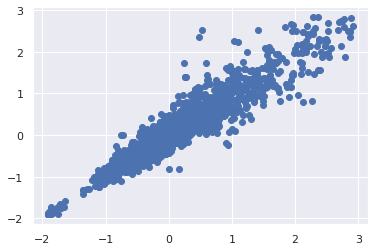

In [54]:
result=model.predict(x_test)
mpt.scatter(y_test, result)
print("Training accuracy:", model.score(x_train, y_train))
print("Testing accuracy:", model.score(x_test, y_test))

We get a test accuracy of 0.919.

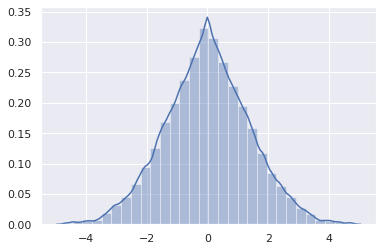

In [55]:
sns.distplot((y_test-result), bins=30)

The curve looks similar to Random Forest Regression.

In [56]:
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, result))
print('R squared: %.2f' %r2_score(y_test, result))
print('Mean absolute Error: %.2f' %mean_absolute_error(y_test, result))
print('RMSE: %.2f' %math.sqrt(mean_squared_error(y_test, result)))

Mean Squared Error: 0.08
R squared: 0.92
Mean absolute Error: 0.19
RMSE: 0.28


# **Hence concluding, we see that out of the four performed algorithms Random Forest Tree is best to normalise the error to much better  extent.**